# 3D Geometries

## Introduction

In this tutorial we will describe how to create 3 dimensional structures that are based on one or more 2d profiles.
We assume that you already know how to create 2d profiles using the `weldx` package.
If this is not the case, please read the corresponding tutorial first.

TODO: add short summary of the tutorial

Before we start, run the following code cells to set everything up that we need.

In [1]:
# if the package is not installed in your python environment, run this to execute the notebook directly from inside the GitHub repository
%cd -q ..

In [2]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt


from weldx.transformations import LocalCoordinateSystem
from weldx.geometry import  Geometry, LinearHorizontalTraceSegment, RadialHorizontalTraceSegment, Profile, Trace


import weldx.transformations as tf
import weldx.visualization as vs

## Trace

The `Trace` class describes an arbitrary path through the 3 dimensional space.
It is build from multiple segments that need to be passed to the `__init__` method of the `Trace`.
Currently there are 2 segment types available: the `LinearHorizontalTraceSegment` that represents a straight line and
the `RadialHorizontalTraceSegment` which describes a circular path.
Both segment types have in common that the `z`-value remains constant and that they are free from torsion.

Let's create one instance of each segment type.
All you need to specify when creating a `LinearHorizontalTraceSegment` is its length:

In [3]:
line_segment = LinearHorizontalTraceSegment(length=10)

That's it.
The `RadialHorizontalTraceSegment` needs a little bit more information.
You need to provide its radius, rotation angle and if the rotation is clockwise or counter-clockwise:

In [4]:
arc_segment = RadialHorizontalTraceSegment(radius=4, angle=np.pi, clockwise=True)

Now that we have some segments, we can create a `Trace`.
Its `__init__` method expects a single segment or a list of segments as first argument.
The individual segments get attached to each other in the same order as they are attached to the list.
Each segment except for the first one gets its start orientation and coordinates from the end of the previous segment.
The initial orientation and coordinates of the `Trace` can be provided in form of a `LocalCoordinateSystem` as optional
second argument to the `__init__` method.
If you omit the second parameter, the `Trace` starts at the origin and is oriented is positive x-direction.


Here is an example:

In [5]:
trace = Trace([line_segment, arc_segment,line_segment])

Like the `Profile` class, the `Trace` possesses a `rasterize` method.
We will use it to plot our `Trace`:

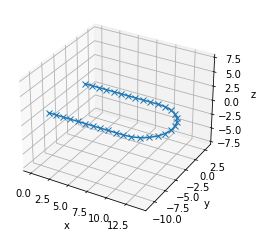

In [6]:
trace_data = trace.rasterize(1)

fig_trace = plt.figure()
ax_trace = fig_trace.gca(projection="3d")
ax_trace.plot(trace_data[0], trace_data[1], trace_data[2], "x-")
ax_trace.set_xlabel("x")
ax_trace.set_ylabel("y")
ax_trace.set_zlabel("z")
vs.set_axes_equal(ax_trace)

Let's provide a initial coordinate system that is rotated 45 degrees around the y-axis and see how that affects the
result:

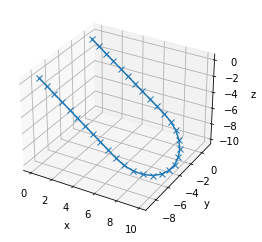

In [7]:
lcs_rot = LocalCoordinateSystem(tf.rotation_matrix_y(np.pi/4))
trace_rot = Trace([line_segment, arc_segment,line_segment], lcs_rot)
trace_rot_data = trace_rot.rasterize(1)

fig_trace_rot = plt.figure()
ax_trace_rot = fig_trace_rot.gca(projection="3d")
ax_trace_rot.plot(trace_rot_data[0], trace_rot_data[1], trace_rot_data[2], "x-")
ax_trace_rot.set_xlabel("x")
ax_trace_rot.set_ylabel("y")
ax_trace_rot.set_zlabel("z")
vs.set_axes_equal(ax_trace_rot)

Linear and radial trace segments already cover a lot of use cases but they are far from beiing enough to cover all
possible needs.
If you need more than those two basic segment types, there are two options.
The first one is to implement your own segment type.